### World Happiness Report Data for 2017 from their website:

The first World Happiness Report was published in April, 2012, in support of the UN High Level Meeting on happiness and well-being. Since then the world has come a long way. Increasingly, happiness is considered to be the proper measure of social progress and the goal of public policy. In June 2016 the OECD committed itself “to redefine the growth narrative to put people’s well-being at the center of governments’ efforts”. In February 2017, the United Arab Emirates held a full-day World Happiness meeting, as part of the World Government Summit. Now on World Happiness Day, March 20th, we launch the World Happiness Report 2017, once again back at the United Nations, again published by the Sustainable Development Solutions Network, and now supported by a generous three-year grant from the Ernesto Illy Foundation. Some highlights are as follows.

Source: Helliwell, J., Layard, R., & Sachs, J. (2017). World Happiness Report 2017, New York: Sustainable Development Solutions Network.

##### Dictionary:

![Dictionary](img/DictionaryData.png)

##### Labeled Visualized Happiness Data Comparison of various countries on varous factors:

![data1-image](img/Data1_Happiness.png)


![data2-image](img/Data2_Happiness.png)


![data3-image](img/Data3_Happiness.png)





In [105]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as LR
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

In [106]:
# data=pd.read_excel("World Happiness Data.xlsx")
data=pd.read_csv("World Happiness Data.csv")
data.head()
data1=data[data.year==2016]

In [107]:
data1.head()
data1=data1.reset_index()
# data1=data1.reset_index()
# help(data1.drop)

In [108]:
# data1.drop('index',axis=1,inplace=True)
# data15Copy.drop('Country',axis=1,inplace=True)
data1=data1.drop('index',axis=1)


In [109]:
data1=data1.drop("WP5 Country",axis=1)
data1=data1.drop(["country","year"],axis=1)

In [112]:
# data1.head()
Y=data1["Life Ladder"].values
X=data1.drop(["Life Ladder","Democratic Quality","Delivery Quality"],axis=1).values
# Y
(data1.head())

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year
0,4.220169,7.497288,0.559072,49.871265,0.522566,0.057393,0.793246,0.564953,0.348332,0.324990,NaN,NaN,1.796219,0.425627
1,4.511101,9.282300,0.638411,68.698380,0.729819,-0.017927,0.901071,0.675244,0.321706,0.400910,NaN,NaN,2.646668,0.586701
2,5.388171,9.549138,0.748150,64.829948,NaN,NaN,NaN,0.668838,0.371372,NaN,NaN,NaN,2.109472,0.391501
3,6.427221,NaN,0.882819,67.443993,0.847702,NaN,0.850924,0.841907,0.311646,0.419562,NaN,NaN,2.127109,0.330953
4,4.325472,8.989569,0.709218,65.409470,0.610987,-0.155814,0.921421,0.593600,0.437228,0.184713,NaN,NaN,2.126364,0.491591


In [113]:
# Here the data is being imputed and the missing values are being replaced with the mean of all the values
data1
# help(Imputer)
imp=Imputer(missing_values="NaN",strategy="mean")
# help(imp.fit_transform)
X=imp.fit_transform(X)
# Y=imp.fit_transform(Y)


In [115]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y)

In [128]:
alg=LR()
alg.fit(xtrain,ytrain)
print(alg.)
print(alg.coef_)
ypred=alg.predict(xtest)

2.8507211426757095
[ 1.76622902e-01  9.01769501e-01 -1.03070120e-03  1.12482174e-01
  4.74188724e-01 -8.76906755e-01  1.20205822e+00  1.03745760e+00
 -2.99787941e-01  1.37255063e+00 -7.44820382e+00]


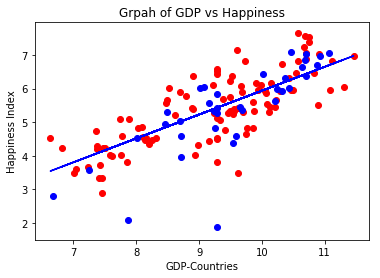

Note: blue dots :- Machine Learning predicted models using >>Multivariate Linear and Logistic Regression<<


In [197]:
plt.scatter(xtrain[:,0],ytrain,color="red")
plt.scatter(xtest[:,0],ypred,color="blue")
alg_pred=LR()
alg_pred.fit(xtrain[:,0].reshape(-1,1),ytrain)
plt.plot(xtrain[:,0],alg_pred.predict(xtrain[:,0].reshape(-1,1)),color="blue")
# plt.scatter(xtest[:,0],ytest,color="black")
plt.xlabel("GDP-Countries")
plt.ylabel("Happiness Index")
plt.title("Grpah of GDP vs Happiness")
plt.show()
print("Note: blue dots :- Machine Learning predicted models using >>Multivariate Linear and Logistic Regression<<")



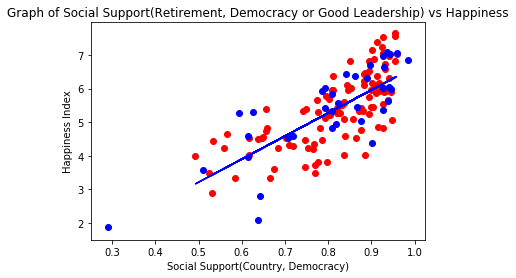

Note: blue dots :- Machine Learning predicted models using >>Multivariate Linear and Logistic Regression<<


In [199]:
plt.scatter(xtrain[:,1],ytrain,color="red")
plt.scatter(xtest[:,1],ypred,color="blue")
alg_pred=LR()
alg_pred.fit(xtrain[:,1].reshape(-1,1),ytrain)
plt.plot(xtrain[:,1],alg_pred.predict(xtrain[:,1].reshape(-1,1)),color="blue")
plt.xlabel("Social Support(Country, Democracy)")
plt.ylabel("Happiness Index")
plt.title("Graph of Social Support(Retirement, Democracy or Good Leadership) vs Happiness")

plt.show()
print("Note: blue dots :- Machine Learning predicted models using >>Multivariate Linear and Logistic Regression<<")

# plt.scatter(xtrain[:,1],ytrain,color="red")
# plt.scatter(xtest[:,1],ypred,color="blue")
# alg_pred=LR()
# alg_pred.fit(xtrain[:,1].reshape(-1,1),ytrain)
# plt.plot(xtrain[:,1],alg_pred.predict(xtrain[:,1].reshape(-1,1)),color="blue")
# plt.show()



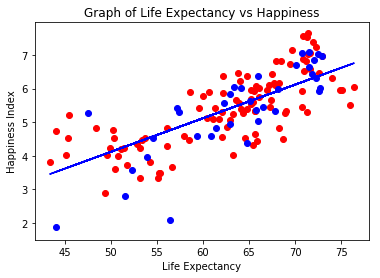

Note: blue dots :- Machine Learning predicted models using >>Multivariate Linear and Logistic Regression<<


In [200]:
plt.scatter(xtrain[:,2],ytrain,color="red")
plt.scatter(xtest[:,2],ypred,color="blue")
alg_pred=LR()
alg_pred.fit(xtrain[:,2].reshape(-1,1),ytrain)
plt.plot(xtrain[:,2],alg_pred.predict(xtrain[:,2].reshape(-1,1)),color="blue")
plt.xlabel("Life Expectancy")
plt.ylabel("Happiness Index")
plt.title("Graph of Life Expectancy vs Happiness")

plt.show()
print("Note: blue dots :- Machine Learning predicted models using >>Multivariate Linear and Logistic Regression<<")


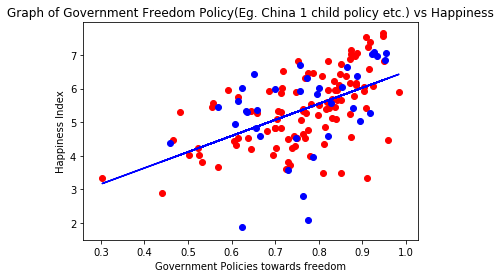

Conclusion: Happy people may or maynot be donating :(- World bank
Note: blue dots :- Machine Learning predicted models using >>Multivariate Linear and Logistic Regression<<


In [191]:
plt.scatter(xtrain[:,3],ytrain,color="red")
plt.scatter(xtest[:,3],ypred,color="blue")
alg_pred=LR()
alg_pred.fit(xtrain[:,3].reshape(-1,1),ytrain)
plt.plot(xtrain[:,3],alg_pred.predict(xtrain[:,3].reshape(-1,1)),color="blue")
plt.xlabel("Government Policies towards freedom")
plt.ylabel("Happiness Index")
plt.title("Graph of Government Freedom Policy(Eg. China 1 child policy etc.) vs Happiness")
plt.show()
print("Conclusion: Happy people may or maynot be donating :(- World bank")
print("Note: blue dots :- Machine Learning predicted models using >>Multivariate Linear and Logistic Regression<<")


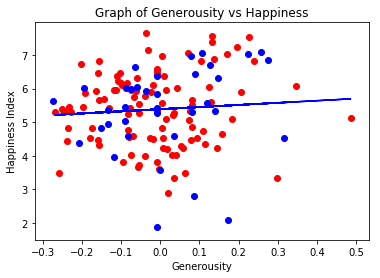

Conclusion: Happy people may or maynot be donating :(- World bank
Note: blue dots :- Machine Learning predicted models using >>Multivariate Linear and Logistic Regression<<


In [193]:
plt.scatter(xtrain[:,4],ytrain,color="red")
plt.scatter(xtest[:,4],ypred,color="blue")
# plt.scatter(xtest[:,0],ytest,color="black")
alg_pred=LR()
alg_pred.fit(xtrain[:,4].reshape(-1,1),ytrain)
plt.plot(xtrain[:,4],alg_pred.predict(xtrain[:,4].reshape(-1,1)),color="blue") 
plt.xlabel("Generousity")
plt.ylabel("Happiness Index")
plt.title("Graph of Generousity vs Happiness")
plt.show()
print("Conclusion: Happy people may or maynot be donating :(- World bank")
print("Note: blue dots :- Machine Learning predicted models using >>Multivariate Linear and Logistic Regression<<")


In [152]:
data1.head(1)

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year
0,4.220169,7.497288,0.559072,49.871265,0.522566,0.057393,0.793246,0.564953,0.348332,0.32499,NaN,NaN,1.796219,0.425627


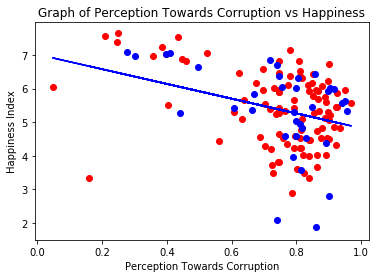

Conclusion: Negative Correlation, higher the corruption, then lower the happiness gets
Conclusion: Countries where corruption is low,People are very happy but at corrupt places the distinction is lost, though correlation is clearly negative
Note: blue dots :- Machine Learning predicted models using >>Multivariate Linear and Logistic Regression<<


In [194]:
plt.scatter(xtrain[:,5],ytrain,color="red")
plt.scatter(xtest[:,5],ypred,color="blue")
alg_pred=LR()
alg_pred.fit(xtrain[:,5].reshape(-1,1),ytrain)
plt.plot(xtrain[:,5],alg_pred.predict(xtrain[:,5].reshape(-1,1)),color="blue")
plt.xlabel("Perception Towards Corruption")
plt.ylabel("Happiness Index")
plt.title("Graph of Perception Towards Corruption vs Happiness")
plt.show()
print("Conclusion: Negative Correlation, higher the corruption, then lower the happiness gets")
print("Conclusion: Countries where corruption is low,People are very happy but at corrupt places the distinction is lost, though correlation is clearly negative")
print("Note: blue dots :- Machine Learning predicted models using >>Multivariate Linear and Logistic Regression<<")


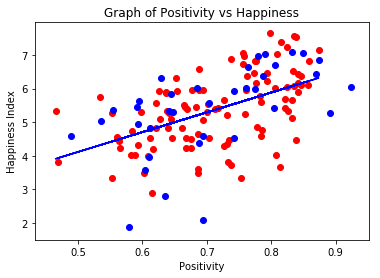

Note: blue dots :- Machine Learning predicted models using >>Multivariate Linear and Logistic Regression<<


In [195]:
plt.scatter(xtrain[:,6],ytrain,color="red")
plt.scatter(xtest[:,6],ypred,color="blue")
alg_pred=LR()
alg_pred.fit(xtrain[:,6].reshape(-1,1),ytrain)
plt.plot(xtrain[:,6],alg_pred.predict(xtrain[:,6].reshape(-1,1)),color="blue")
plt.xlabel("Positivity")
plt.ylabel("Happiness Index")
plt.title("Graph of Positivity vs Happiness")
plt.show()

print("Note: blue dots :- Machine Learning predicted models using >>Multivariate Linear and Logistic Regression<<")


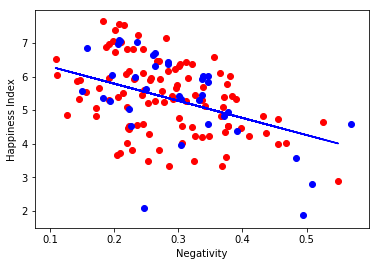

Note: blue dots :- Machine Learning predicted models using >>Multivariate Linear and Logistic Regression<<


In [196]:
plt.scatter(xtrain[:,7],ytrain,color="red")
plt.scatter(xtest[:,7],ypred,color="blue")
alg_pred=LR()
alg_pred.fit(xtrain[:,7].reshape(-1,1),ytrain)
plt.plot(xtrain[:,7],alg_pred.predict(xtrain[:,7].reshape(-1,1)),color="blue")
plt.xlabel("Negativity")
plt.ylabel("Happiness Index")
plt.show()
print("Note: blue dots :- Machine Learning predicted models using >>Multivariate Linear and Logistic Regression<<")
